<a href="https://colab.research.google.com/github/DataMinati/Super-Notebooks-100/blob/main/Indian_Startups.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

### Loading Data

In [2]:
startup=pd.read_csv('https://raw.githubusercontent.com/MainakRepositor/Datasets-/master/Indian%20startups%20funding%20in%202021.csv')
startup


,Company/Brand,Founded,Headquarters,Sector,What it does,Founder/s,Investor/s,Amount(in dollars),Stage,Month
0,CollegeDekho,2015.0,Gurgaon,E-learning,"Collegedekho.com is Student’s Partner, Friend ...",Ruchir Arora,"Disrupt ADQ, QIC",35000000,Series B,12
1,BOX8,2012.0,Mumbai,Food & Beverages,India's Largest Desi Meals Brand,"Anshul Gupta, Amit Raj",Tiger Global,40000000,NaN,12
2,Simpl,2015.0,Bangalore,Consumer Services,Simpl empowers merchants to build trusted rela...,"Nitya, Chaitra Chidanand","Valar Ventures, IA Ventures",40000000,Series B,12
3,8i Ventures,2018.0,Mumbai,Venture Capital & Private Equity,8i is a Mumbai & Bangalore based early stage f...,Vikram Chachra,NaN,50000000,NaN,12
4,PayGlocal,2021.0,Bangalore,Financial Services,PayGlocal is a FinTech solving for global paym...,"Prachi Dharani, Rohit Sukhija, Yogesh Lokhande",Sequoia Capital India,4900000,Series A,12
...,...,...,...,...,...,...,...,...,...,...
1189,HobSpace,2019.0,Mumbai,EdTech,HobSpace is a platform for extra-curricular ac...,"Priya Goel Sheth, Harsh Jain","Siddharth Bhaskar Shah, Upsparks","1,00,000",Pre-series A1,1
1190,DcodeAI,2020.0,New Delhi,EdTech,EMPOWER LEARNERS TO BE FUTURE READY USING AI,"Kartik Sharma, Ashish Aggarwal",S Chand,"5,00,000",NaN,1
1191,Biocon Biologics,1978.0,Bangalore,BioTechnology,Biocon is a fully integrated pure play biosimi...,Kiran Mazumdar-Shaw,"Goldman Sachs, Tata Capital","7,00,00,000",NaN,1
1192,KiranaKart,2020.0,Mumbai,E-commerce,A better model for instant grocery delivery in...,"Kaivalya Vohra, Aadit Palicha",Global Founders Capital,"7,20,000",Pre-seed,1


In [3]:
startup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1194 entries, 0 to 1193
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Company/Brand       1194 non-null   object 
 1   Founded             1193 non-null   float64
 2   Headquarters        1193 non-null   object 
 3   Sector              1194 non-null   object 
 4   What it does        1194 non-null   object 
 5   Founder/s           1190 non-null   object 
 6   Investor/s          1135 non-null   object 
 7   Amount(in dollars)  1189 non-null   object 
 8   Stage               775 non-null    object 
 9   Month               1194 non-null   int64  
dtypes: float64(1), int64(1), object(8)
memory usage: 93.4+ KB


### Data Cleaning

In [4]:
startup['Amount(in dollars)'].unique()

array(['35000000', '40000000', '50000000', '4900000', '145000000',
       '22000000', '10000000', '13000000', '70000000', '100000000',
       '6700000', '30000000', '7000000', '5000000', '6600000', '32000000',
       '150000000', '24000000', '700000', 'Undisclosed', '200000',
       '1500000', '1300000', '1000000', '725000', '500000', '461000',
       'Series C', 'Seed', '96000000', '4000000', '60000000', '20000000',
       '500000000', '266000000', '4500000', '1200000', '300000',
       '9500000', '325000000', '6500000', '1600000', '400000', '225000',
       '85000000', '235000', '260000', '2900000', '12000000', '53000000',
       '3500000', '3000000', '2000000', '3300000', '150000', '92000000',
       '600000', '100000', '17000000', '2500000', '135000000', '8000000',
       '15000000', '5500000', '6000000', '1,55,000', '2100000',
       '25000000', '21000000', '840000000', '248000000', '220000000',
       '4300000', '570000', '2200000', '4700000', '300000000', '52000000',
       '280

In [5]:
startup.rename(columns={'Amount(in dollars)':'Amount'},inplace=True)

In [6]:
startup=startup[startup.Amount!='Undisclosed']
startup=startup[startup.Amount!='undisclosed']
startup=startup[startup.Amount!='Series C']
startup=startup[startup.Amount!='LetsVenture']
startup=startup[startup.Amount!='ITO Angel Network']
startup=startup[startup.Amount!='JITO Angel Network']
startup=startup[startup.Amount!='Pre-series A']
startup=startup[startup.Amount!='Upsparks']
startup=startup[startup.Amount!='Seed']
startup=startup[startup.Amount!='nan']
startup=startup[startup.Amount!='ah! Ventures']
startup=startup[startup.Amount!='ITO Angel Network, LetsVenture']
startup=startup[startup.Amount!='JITO Angel Network LetsVenture']
startup=startup[startup.Amount!='JITO Angel Network, LetsVenture']

In [7]:
def conv(x):
    if type(x)==str:
        h=int(x.replace(',',''))
#         print(type(h))
        return h
    elif type(x)!=float and x.isnull():
        return 0
    else:
#         print(type(x))
        return 0
        
    
startup['Amount'].apply(lambda x: conv(x))
# startup['Amount'].apply(lambda x: int(x))

0       35000000
1       40000000
2       40000000
3       50000000
4        4900000
          ...   
1189      100000
1190      500000
1191    70000000
1192      720000
1193     3000000
Name: Amount, Length: 1049, dtype: int64

In [8]:
startup['Amount'].unique()

array(['35000000', '40000000', '50000000', '4900000', '145000000',
       '22000000', '10000000', '13000000', '70000000', '100000000',
       '6700000', '30000000', '7000000', '5000000', '6600000', '32000000',
       '150000000', '24000000', '700000', '200000', '1500000', '1300000',
       '1000000', '725000', '500000', '461000', '96000000', '4000000',
       '60000000', '20000000', '500000000', '266000000', '4500000',
       '1200000', '300000', '9500000', '325000000', '6500000', '1600000',
       '400000', '225000', '85000000', '235000', '260000', '2900000',
       '12000000', '53000000', '3500000', '3000000', '2000000', '3300000',
       '150000', '92000000', '600000', '100000', '17000000', '2500000',
       '135000000', '8000000', '15000000', '5500000', '6000000',
       '1,55,000', '2100000', '25000000', '21000000', '840000000',
       '248000000', '220000000', '4300000', '570000', '2200000',
       '4700000', '300000000', '52000000', '28000000', '260000000',
       '140000000', '

In [9]:
startup['Amount'].apply(lambda x:0 if type(x)!=int else x)

0       0
1       0
2       0
3       0
4       0
       ..
1189    0
1190    0
1191    0
1192    0
1193    0
Name: Amount, Length: 1049, dtype: int64

In [10]:
# startup['Amount'].unique()
startup

,Company/Brand,Founded,Headquarters,Sector,What it does,Founder/s,Investor/s,Amount,Stage,Month
0,CollegeDekho,2015.0,Gurgaon,E-learning,"Collegedekho.com is Student’s Partner, Friend ...",Ruchir Arora,"Disrupt ADQ, QIC",35000000,Series B,12
1,BOX8,2012.0,Mumbai,Food & Beverages,India's Largest Desi Meals Brand,"Anshul Gupta, Amit Raj",Tiger Global,40000000,NaN,12
2,Simpl,2015.0,Bangalore,Consumer Services,Simpl empowers merchants to build trusted rela...,"Nitya, Chaitra Chidanand","Valar Ventures, IA Ventures",40000000,Series B,12
3,8i Ventures,2018.0,Mumbai,Venture Capital & Private Equity,8i is a Mumbai & Bangalore based early stage f...,Vikram Chachra,NaN,50000000,NaN,12
4,PayGlocal,2021.0,Bangalore,Financial Services,PayGlocal is a FinTech solving for global paym...,"Prachi Dharani, Rohit Sukhija, Yogesh Lokhande",Sequoia Capital India,4900000,Series A,12
...,...,...,...,...,...,...,...,...,...,...
1189,HobSpace,2019.0,Mumbai,EdTech,HobSpace is a platform for extra-curricular ac...,"Priya Goel Sheth, Harsh Jain","Siddharth Bhaskar Shah, Upsparks","1,00,000",Pre-series A1,1
1190,DcodeAI,2020.0,New Delhi,EdTech,EMPOWER LEARNERS TO BE FUTURE READY USING AI,"Kartik Sharma, Ashish Aggarwal",S Chand,"5,00,000",NaN,1
1191,Biocon Biologics,1978.0,Bangalore,BioTechnology,Biocon is a fully integrated pure play biosimi...,Kiran Mazumdar-Shaw,"Goldman Sachs, Tata Capital","7,00,00,000",NaN,1
1192,KiranaKart,2020.0,Mumbai,E-commerce,A better model for instant grocery delivery in...,"Kaivalya Vohra, Aadit Palicha",Global Founders Capital,"7,20,000",Pre-seed,1


### Data Representation

In [29]:
sc = startup.groupby(['Sector'])['Amount'].count().nlargest(10)
sc

Sector
FinTech                              108
EdTech                                82
Financial Services                    56
Information Technology & Services     35
E-commerce                            34
Automotive                            29
Food & Beverages                      27
Healthcare                            27
E-learning                            23
Consumer Goods                        22
Name: Amount, dtype: int64

In [17]:
hq = startup.groupby(['Headquarters'])['Amount'].count().nlargest(5)
hq

Headquarters
Bangalore    378
Mumbai       171
Gurugram     136
New Delhi    122
Pune          39
Name: Amount, dtype: int64

In [13]:
startup.groupby(['Founded'])['Amount'].count().nlargest(5)

Founded
2020.0    196
2019.0    143
2018.0    127
2015.0    117
2016.0    103
Name: Amount, dtype: int64

In [18]:
hq = hq.to_numpy()
hq

array([378, 171, 136, 122,  39])

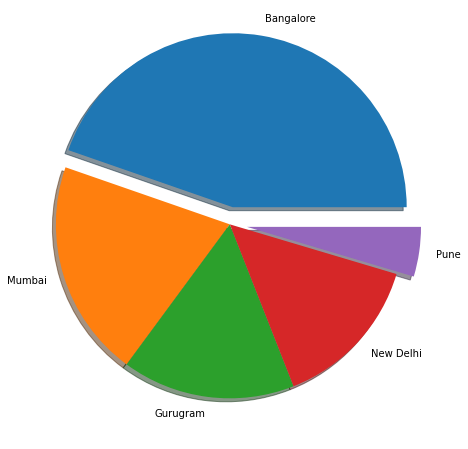

In [26]:
headquarters = hq
mylabels = ["Bangalore", "Mumbai", "Gurugram", "New Delhi","Pune"]
myexplode = [0.1, 0, 0, 0, 0.1]
plt.figure(figsize=(10,8))
plt.pie(headquarters, labels = mylabels, explode = myexplode, shadow = True)
plt.show() 

In [30]:
sc = sc.to_numpy()
sc

array([108,  82,  56,  35,  34,  29,  27,  27,  23,  22])

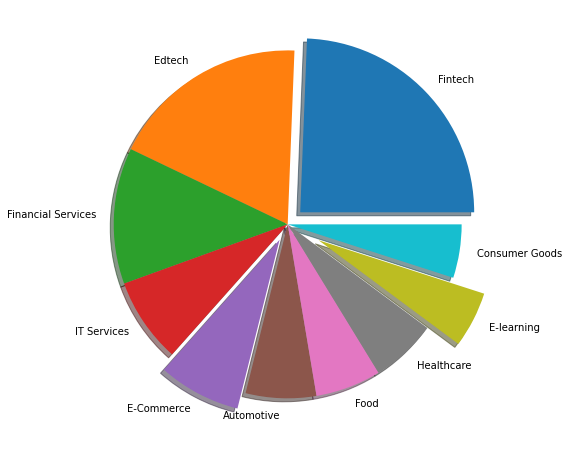

In [31]:
sectors = sc
mylabels = ["Fintech", "Edtech", "Financial Services", "IT Services","E-Commerce","Automotive","Food","Healthcare","E-learning","Consumer Goods"]
myexplode = [0.1, 0, 0, 0, 0.1, 0, 0, 0, 0.2, 0]
plt.figure(figsize=(10,8))
plt.pie(sectors, labels = mylabels, explode = myexplode, shadow = True)
plt.show() 

In [38]:
print(startup[startup.Founded == 2021.0])


     Company/Brand  Founded Headquarters  ...       Amount     Stage Month
4        PayGlocal   2021.0    Bangalore  ...      4900000  Series A    12
17        Trinkerr   2021.0    Bangalore  ...      6600000  Series A    12
18           Zorro   2021.0     Gurugram  ...     32000000      Seed    12
19   Ultraviolette   2021.0    Bangalore  ...    150000000  Series C    12
23      PingoLearn   2021.0         Pune  ...       200000       NaN    12
..             ...      ...          ...  ...          ...       ...   ...
845   Mensa Brands   2021.0    Bangalore  ...  5,00,00,000  Series A     5
846     Disruptium   2021.0    Ahmadabad  ...     2,00,000       NaN     5
875       FypMoney   2021.0     Gurugram  ...    20,00,000      Seed     4
901   Jambox Games   2021.0    Bangalore  ...    11,00,000      Seed     4
916        moEVing   2021.0     Gurugram  ...    10,00,000      Seed     4

[64 rows x 10 columns]
